![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot: >

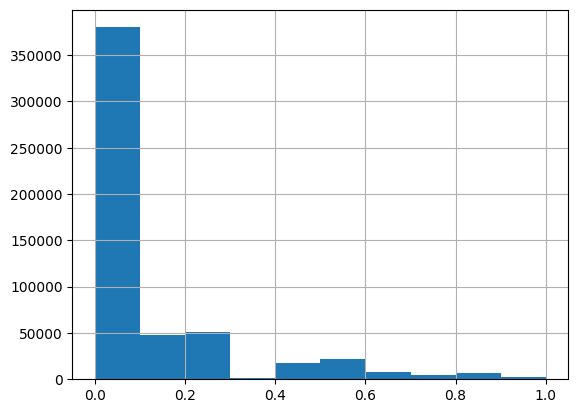

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
df.shape

(541462, 3)

El set de datos contiene 541.462 observaciones, un ID, el comentario, y la probabilidad de que sea tóxico
En el histograma se evidencia que aproximadamente las dos terceras partes del set de datos tiene una probabilidad de 0.0 de que sea tóxico

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 1
vect_A = CountVectorizer(stop_words= 'english')
X_train_A = vect_A.fit_transform(X_train)
X_test_A = vect_A.transform(X_test)

In [10]:
print(X_train_A.shape)
print(X_test_A.shape)

(362779, 140862)
(178683, 140862)


In [11]:
# Definición de modelo Random Forest para un problema de regresión
rrf1 = RandomForestRegressor(max_depth=5, random_state=12345, n_jobs=-1)
rrf1.fit(X_train_A, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=12345)

In [12]:
#Impresión de desempeño del modelo
y_pred_A = rrf1.predict(X_test_A)

# MSE
rrf1_MSE = mean_squared_error(y_test, y_pred_A)
print("MSE: %.3f" %rrf1_MSE )
# MAE
rrf1_MAE = mean_absolute_error(y_test, y_pred_A)
print("MAE: %.3f" %rrf1_MAE )

MSE: 0.033
MAE: 0.133


Se realizó una implementación de un modelo de regresión de bosques aleatorios (Random Forest regresíón), utilizando la función CountVectorizer para crear matrices en los comentarios y se evaluo mediantes metricas MAE (0.133) Y MSE (0.033).

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 2
vect_B = CountVectorizer(stop_words= 'english', ngram_range=(3,3))
X_train_B = vect_B.fit_transform(X_train)
X_test_B = vect_B.transform(X_test)

In [14]:
print(X_train_B.shape)
print(X_test_B.shape)

(362779, 7662571)
(178683, 7662571)


In [15]:
# Definición de modelo Random Forest para un problema de regresión
rrf2 = RandomForestRegressor(max_depth=5, random_state=12345, n_jobs=-1)
rrf2.fit(X_train_B,y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=12345)

In [16]:
#Impresión de desempeño del modelo
y_pred_B = rrf2.predict(X_test_B)

# MSE
rrf2_MSE = mean_squared_error(y_test, y_pred_B)
print("MSE: %.3f" %rrf2_MSE )
# MAE
rrf2_MAE = mean_absolute_error(y_test, y_pred_B)
print("MAE: %.3f" %rrf2_MAE )

MSE: 0.039
MAE: 0.145


A continuación, se describe el procedimiento realizado:

- Creamos matrices usando CountVectorizer y triagramas, utilizando el conjunto de datos en conjuntos de entrenamiento y prueba de la función train_test_split() de scikit-learn,almacenados en entrenamiento y pruebas en las variables x_train, x_test, y_train e y_test, respectivamente.

- Se crea X_train_vec, con la función vec.fit_transform(X_train) y X_test_vec = vec.transform(X_test).

- Se ajusta el modelo utilizando los datos de entrenamiento con la función fit(). *Se realizan predicciones en los datos de prueba utilizando el método predict() del objeto. *Se calcula el desempeño del modelo con MSE Y MAE. En este caso se observa que el modelo no mejora las métrica del modelos sin triagrama del punto 1,  con un MSE 0.039  y MAE 0.145.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

In [16]:
#Celda 3

El método Term Frequency-Inverse Document Frequency (TF-IDF) o **Término de frecuencia-frecuencia inversa del documento (TF-IDF)** evalúa la importancia de una palabra para un documento dentro de un conjunto de documentos. La importancia aumenta proporcionalmente por el número de veces que aparece una palabra en el documento, pero se compensa con la frecuencia de la palabra en el conjunto de documentos.

El peso TF-IDF es el producto de dos términos, primero uno que calcula la frecuencia de término normalizada (TF) o el número de veces que aparece una palabra en un documento dividido por el número total de palabras en ese documento y el segundo es la Frecuencia Inversa de Documentos (IDF) que se calcula como el logaritmo del número de documentos en el conjunto dividido por el número de documentos donde aparece el término específico.

Entonces:
* Si una palabra aparece varias veces en un documento, es probable que sea importante.
* Si una palabra aparece varias veces en varios documentos, es poco probable que sea importante.

Por lo tanto, una palabra que aparece a menudo en un documento pero casi no en los demás, es menos importante y no debe recibir tanta atención. Además **TfidfVectorizer**, aplica una ponderación para que las palabras comunes reciban menos atención y las palabras menos comunes reciban más.

**Ventajas y deventajas deL uso de TfidfVectorizer al compararlo con la función CountVectorizer**

La ventaja de **TfidfVectorizer** con respecto a **CountVectorizer** es principalmente que tiene en cuenta la importancia o relevancia de las palabras dentro de un texto y no solamente el conteo. Sin embargo, como **CountVectorizer**, no proporciona información lingüística sobre las palabras, como el significado real de las palabras, la similitud con otras palabras, etc.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
# Celda 4
vect_C = TfidfVectorizer(stop_words= 'english')
X_train_C = vect_C.fit_transform(X_train)
X_test_C = vect_C.transform(X_test)

In [18]:
print(X_train_C.shape)
print(X_test_C.shape)

(362779, 140862)
(178683, 140862)


In [19]:
# Definición de modelo Random Forest para un problema de regresión
rrf3 = RandomForestRegressor(max_depth=5, random_state=12345, n_jobs=-1)
rrf3.fit(X_train_C, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=12345)

In [20]:
#Impresión de desempeño del modelo
y_pred_C = rrf3.predict(X_test_C)

# MSE
rrf3_MSE = mean_squared_error(y_test, y_pred_C)
print("MSE: %.3f" %rrf3_MSE )
# MAE
rrf3_MAE = mean_absolute_error(y_test, y_pred_C)
print("MAE: %.3f" %rrf3_MAE )

MSE: 0.033
MAE: 0.133


A continuación, se describe el procedimiento realizado:

- Creamos matrices usando TfidfVectorizera, utilizando el conjunto de datos en conjuntos de entrenamiento y prueba de la función train_test_split() de scikit-learn,almacenados en entrenamiento y pruebas en las variables x_train, x_test, y_train e y_test, respectivamente.

- Se crea X_train_vec2, con la función vectorizer.fit_transform y X_test_vec2 = vectorizer.transform(X_test), *Se ajusta el modelo utilizando los datos de entrenamiento con la función fit(). *Se realizan predicciones en los datos de prueba utilizando el método predict() del objeto. *Se calcula el desempeño del modelo con MSE Y MAE. En este caso se observa que el modelo da como resultado el desempeño con un MSE 0.033 y MAE 0.133.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

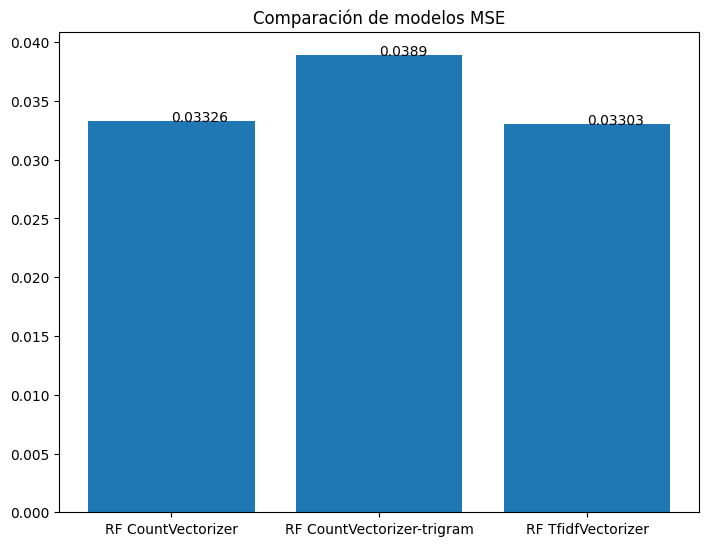

In [21]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos MSE")
ejeX = ['RF CountVectorizer','RF CountVectorizer-trigram','RF TfidfVectorizer']
ejeY = [round(rrf1_MSE,5), round(rrf2_MSE,5), round(rrf3_MSE,5)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Finalmente, se puede concluir que el modelo de tokenización con **TfidfVectorizer** es ligeramente mejor porque tiene en cuenta la importancia o relevancia de las palabras en los textos y da un peso a cada una con respecto al conjunto.

Aunque la diferencia ente los modelos no es significativa si se puede apreciar que al abordar el problema con trigramas se impacta negativamente el desempeño de la predicción. Los tres modelos evidencian la importancia de pre-procesar el texto, y aque este afecta directamente el desempeño.

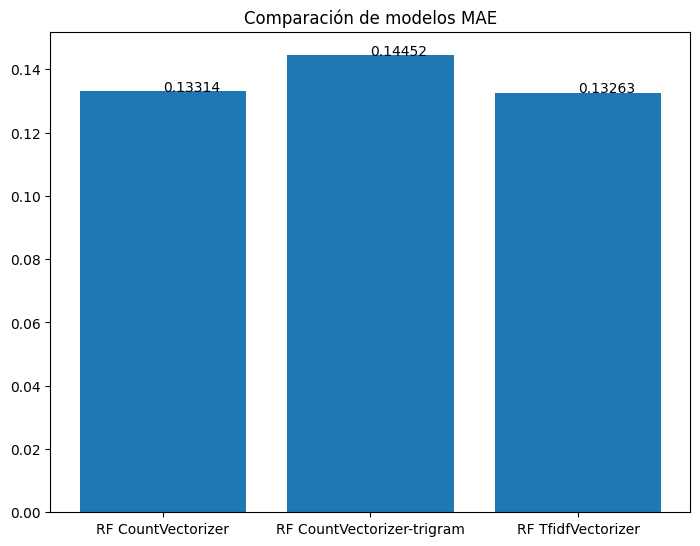

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos MAE")
ejeX = ['RF CountVectorizer','RF CountVectorizer-trigram','RF TfidfVectorizer']
ejeY = [round(rrf1_MAE,5), round(rrf2_MAE,5), round(rrf3_MAE,5)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()